In [23]:
import time 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random
import datetime
import csv
# import undetected_chromedriver as uc
import pandas as pd
# import cpca
import numpy as np
import sqlite3
# import cursor

In [24]:
df = pd.read_csv('page_entries_location.csv')

In [25]:
df.head()

,replyID,replyDate,reply_object,replyInfoHead,typeNameD,stateInfo,single_url,province,city,county,zipcode
0,17193453,2023-01-23 10:19:00,山西省长治市长子县委书记,关于天然气停气,投诉/求助,待回复,http://liuyan.people.com.cn/threads/content?ti...,山西省,长治市,长子县,140428
1,17167343,2023-01-16 19:26:00,山西省长治市上党区委书记,郝家庄镇岭上村供气不足供暖不足,投诉/求助,办理中,http://liuyan.people.com.cn/threads/content?ti...,山西省,长治市,NaN,140400
2,17163718,2023-01-16 02:38:00,山西省太原市尖草坪区委书记,西留庄留苑小区暖气,投诉/求助,待回复,http://liuyan.people.com.cn/threads/content?ti...,山西省,太原市,尖草坪区,140108
3,17038159,2022-12-28 05:10:00,山西省晋中市灵石县委书记,煤气公司每年腊月基本白天都在停气！,投诉/求助,已办理,http://liuyan.people.com.cn/threads/content?ti...,山西省,晋中市,灵石县,140729
4,16999145,2022-12-23 08:37:00,山西省委书记蓝佛安,关于洪洞县堤村乡干河村天然气每晚停气,投诉/求助,待回复,http://liuyan.people.com.cn/threads/content?ti...,山西省,NaN,NaN,140000


In [ ]:
urls = df.single_url
urls

0       http://liuyan.people.com.cn/threads/content?ti...
1       http://liuyan.people.com.cn/threads/content?ti...
2       http://liuyan.people.com.cn/threads/content?ti...
3       http://liuyan.people.com.cn/threads/content?ti...
4       http://liuyan.people.com.cn/threads/content?ti...
                              ...                        
1051    http://liuyan.people.com.cn/threads/content?ti...
1052    http://liuyan.people.com.cn/threads/content?ti...
1053    http://liuyan.people.com.cn/threads/content?ti...
1054    http://liuyan.people.com.cn/threads/content?ti...
1055    http://liuyan.people.com.cn/threads/content?ti...
Name: single_url, Length: 1056, dtype: object

In [ ]:
b = 500
for url in urls[500:]:
    b = b + 1
    driver = uc.Chrome()
    try:
        driver.get(url)
        content = BeautifulSoup(driver.page_source, 'html.parser')

        title = content.find('h1', class_='fl').text
        reply_object = content.find('div', class_='replyObject').text[5:]
        typeNameD = content.find('p', class_='typeNameD').text 
        domainName = content.find('p', class_='domainName').text
        stateInfo = content.find('p', class_='stateInfo').text

        #get the location info
        # df_location = cpca.transform(reply_object, pos_sensitive=False)


        replyInfoHead = content.find('h1', class_='fl').text
        replyName = content.find('li', class_='replyName').text
        replyMsg_org = content.find('li', class_='replyMsg').text

        replyID = replyMsg_org[3:11]
        replyDate = replyMsg_org[11:].replace(u'\xa0', u' ')
        replyContentMain = content.find('p', class_='replyContentMain').text
        #replace line break with space
        replyContentMain = replyContentMain.replace('\n', ' ')


        if stateInfo == '待回复':
            handleTime = None
            handleContent = None
        else:
            handleTime = content.find('div', class_='handleTime').text.replace(u'\xa0', u' ')
            handleContent = content.find('p', class_='handleContent').text
            handleContent = handleContent.replace('\n', ' ')


        single_reply = {}

        single_reply['replyID'] = replyID
        single_reply['replyDate'] = replyDate
        single_reply['typeNameD'] = typeNameD
        single_reply['title'] = title
        single_reply['reply_object'] = reply_object
        
        # single_reply['province'] = df_location['省']
        # single_reply['city'] = df_location['市']
        # single_reply['county'] = df_location['区']
        # single_reply['zipcode'] = df_location['adcode']

        # single_reply['replyInfoHead'] = replyInfoHead
        single_reply['domainName'] = domainName
        single_reply['stateInfo'] = stateInfo
        single_reply['replyName'] = replyName
        single_reply['replyContentMain'] = replyContentMain
        single_reply['handleTime'] = handleTime
        single_reply['handleContent'] = handleContent
        single_reply['url'] = url

        #save the reply
        with open('all_pages.csv', 'a', encoding='utf-8-sig', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(single_reply.values())
        
        #close the window
        
        previewPic = content.find_all('div', class_='previewPic')
        if previewPic == None:
            print('no pic')
        else:
            a = 0
            for i in previewPic:
                a = a + 1
                #save the picture
                pic_url = i.find('img')['src']
                pic_name = replyID + '-' + str(a) + '.jpg'
                print(pic_url)
                print(pic_name)
                #using undetected_chromedriver to save the picture
                driver.get(pic_url)
                driver.save_screenshot(pic_name)
                time.sleep(random.randint(1,3))
        driver.close()
        print(b)
    except:
        print('error')
        driver.close()
        continue


In [26]:
all_pages = pd.read_csv('all_pages.csv')

#adding a header to all_pages
all_pages.columns = ['replyID', 'replyDate', 'typeNameD', 'title', 'reply_object', 'domainName', 'stateInfo', 'replyName', 'replyContentMain', 'handleTime', 'handleContent', 'url']

In [27]:
all_pages


,replyID,replyDate,typeNameD,title,reply_object,domainName,stateInfo,replyName,replyContentMain,handleTime,handleContent,url
0,17167343,2023-01-16 19:26,投诉/求助,郝家庄镇岭上村供气不足供暖不足,山西省长治市上党区委书记,城建,办理中,吾***,自今年冬天入冬以来，上党区郝家庄镇岭上村天然气供气供暖都不足，每天一到做饭就没气，-15°的...,2023-01-17 19:31,您的留言我们已收到！您反映的问题已转相关部门处理，感谢您的宝贵留言！,http://liuyan.people.com.cn/threads/content?ti...
1,17163718,2023-01-16 02:38,投诉/求助,西留庄留苑小区暖气,山西省太原市尖草坪区委书记,城建,待回复,W***,尊敬的领导您好！我们这小区暖气每年晚来不说，来了家里面才13度，而且还是断断续续的给停。每次...,NaN,NaN,http://liuyan.people.com.cn/threads/content?ti...
2,17038159,2022-12-28 05:10,投诉/求助,煤气公司每年腊月基本白天都在停气！,山西省晋中市灵石县委书记,城建,已办理,m***,静升镇这儿的煤气公司每年腊月白天各种停气，也不发通知，也没有公告，打电话从来打不进去。蒸馒头...,2023-01-06 04:54,尊敬的人民网网友： 您好！您的留言已收悉，现将办理结果回复如下：相关单位已协调气源厂加压...,http://liuyan.people.com.cn/threads/content?ti...
3,16999145,2022-12-23 08:37,投诉/求助,关于洪洞县堤村乡干河村天然气每晚停气,山西省委书记蓝佛安,三农,待回复,8***,"我们村天然气每天晚上停气，严重影响到村民们正常生活和取暖问题,很多村民在村里反应，但是不给...",NaN,NaN,http://liuyan.people.com.cn/threads/content?ti...
4,16955074,2022-12-20 01:30,建言,取暖问题,山西省临汾市市长李云峰,三农,待回复,Z***,尊敬的领导你好 曲沃县裴南庄村三天两头停气，如此冷的天气，老人和...,NaN,NaN,http://liuyan.people.com.cn/threads/content?ti...
...,...,...,...,...,...,...,...,...,...,...,...,...
1045,16840497,2022-12-05 03:35,建言,农村天然气取暖,河北省委书记倪岳峰,三农,已办理,W***,领导您好：我是河北省邢台市隆尧县东良镇小干言村村民。现在已进入冬季，农村现在响应国家号召实行...,2023-01-19 03:49,网民您好！经协调督办，您反映的停气问题已得到解决。相关情况已与您进行了沟通。感谢您对我们工作...,http://liuyan.people.com.cn/threads/content?ti...
1046,16841053,2022-12-05 04:28,建言,我村经常停天然气,河北省委书记倪岳峰,三农,已办理,W***,由于天气很冷，我村天天停天然气，之前不让购买，现在让购买了天天停天然气，希望能尽快解决！！！,2023-01-19 03:48,网民您好！经协调督办，您反映的停气问题已得到解决。相关情况已与您进行了沟通。感谢您对我们工作...,http://liuyan.people.com.cn/threads/content?ti...
1047,16844344,2022-12-05 09:53,投诉/求助,鸡泽县中燃公司 限购天然气。经常停气，,河北省邯郸市市长樊成华,三农,已办理,可***,鸡泽县中燃公司 限购天然气。经常停气，老百姓无法正常过冬，又不让烧煤，寒心了,2022-12-27 02:54,网民您好！针对您反映的问题，市政府高度重视，责成鸡泽县政府核实办理，现就您反映的问题答复如下...,http://liuyan.people.com.cn/threads/content?ti...
1048,16845394,2022-12-05 17:23,投诉/求助,煤改气,河北省保定市委书记党晓龙,三农,已办理,马***,尊敬的书记好，我们是安国市南马村人，我们村煤改气前冬季取暖费3000以内就够了，改成天然气了...,2022-12-17 03:22,网民您好，您反映的问题我办已积极受理，交办至安国市发改局、住建局、南娄底乡调查解决。相关单位...,http://liuyan.people.com.cn/threads/content?ti...


In [35]:
import cpca
df_location_1 = cpca.transform(all_pages['reply_object'], pos_sensitive=False)
df_location_1['市']


ModuleNotFoundError: No module named 'cpca'

In [ ]:
#count the None value
df_location_1['市'].isnull().sum()

251

In [ ]:
df_location_2 = cpca.transform(all_pages['replyContentMain'], pos_sensitive=False)
df_location_2.to_csv('df_location_2.csv')

df_location_2['市'].isnull().sum()

463

In [ ]:
anum = 0
for i in df_location_1['市']:
    if i == None:
        if df_location_1['省'][anum] == df_location_2['省'][anum]:
            df_location_1['市'][anum] = df_location_2['市'][anum]
            df_location_1['区'][anum] = df_location_2['区'][anum]
            df_location_1['adcode'][anum] = df_location_2['adcode'][anum]
            anum = anum + 1
            continue
        else:
            anum = anum + 1
            continue
    else:
        anum = anum + 1
        continue




In [ ]:
df_location_1['市'].isnull().sum()
df_location_1['区'].isnull().sum()

561

In [ ]:
all_pages['province'] = df_location_1['省']
all_pages['city'] = df_location_1['市']
all_pages['county'] = df_location_1['区']
all_pages['zipcode'] = df_location_1['adcode']

all_pages['zipcode'].isnull().sum()


0

In [ ]:
all_pages_location = all_pages[['replyID', 'replyDate', 'typeNameD', 'title', 'reply_object', 'province', 'city', 'county', 'zipcode', 'domainName', 'stateInfo', 'replyName', 'replyContentMain', 'handleTime', 'handleContent', 'url']]

In [ ]:
all_pages_location.to_csv('all_pages_location.csv', index=False)

In [134]:
# read csv, ingore index
all_pages_location = pd.read_csv('all_pages_location.csv', index_col=None)

all_pages_location

,replyID,replyDate,typeNameD,title,reply_object,province,city,county,zipcode,domainName,stateInfo,replyName,replyContentMain,handleTime,handleContent,url
0,17167343,2023-01-16 19:26,投诉/求助,郝家庄镇岭上村供气不足供暖不足,山西省长治市上党区委书记,山西省,长治市,NaN,140400,城建,办理中,吾***,自今年冬天入冬以来，上党区郝家庄镇岭上村天然气供气供暖都不足，每天一到做饭就没气，-15°的...,2023-01-17 19:31,您的留言我们已收到！您反映的问题已转相关部门处理，感谢您的宝贵留言！,http://liuyan.people.com.cn/threads/content?ti...
1,17163718,2023-01-16 02:38,投诉/求助,西留庄留苑小区暖气,山西省太原市尖草坪区委书记,山西省,太原市,尖草坪区,140108,城建,待回复,W***,尊敬的领导您好！我们这小区暖气每年晚来不说，来了家里面才13度，而且还是断断续续的给停。每次...,NaN,NaN,http://liuyan.people.com.cn/threads/content?ti...
2,17038159,2022-12-28 05:10,投诉/求助,煤气公司每年腊月基本白天都在停气！,山西省晋中市灵石县委书记,山西省,晋中市,灵石县,140729,城建,已办理,m***,静升镇这儿的煤气公司每年腊月白天各种停气，也不发通知，也没有公告，打电话从来打不进去。蒸馒头...,2023-01-06 04:54,尊敬的人民网网友： 您好！您的留言已收悉，现将办理结果回复如下：相关单位已协调气源厂加压...,http://liuyan.people.com.cn/threads/content?ti...
3,16999145,2022-12-23 08:37,投诉/求助,关于洪洞县堤村乡干河村天然气每晚停气,山西省委书记蓝佛安,山西省,NaN,NaN,140000,三农,待回复,8***,"我们村天然气每天晚上停气，严重影响到村民们正常生活和取暖问题,很多村民在村里反应，但是不给...",NaN,NaN,http://liuyan.people.com.cn/threads/content?ti...
4,16955074,2022-12-20 01:30,建言,取暖问题,山西省临汾市市长李云峰,山西省,临汾市,NaN,141000,三农,待回复,Z***,尊敬的领导你好 曲沃县裴南庄村三天两头停气，如此冷的天气，老人和...,NaN,NaN,http://liuyan.people.com.cn/threads/content?ti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,16840497,2022-12-05 03:35,建言,农村天然气取暖,河北省委书记倪岳峰,河北省,邢台市,隆尧县,130525,三农,已办理,W***,领导您好：我是河北省邢台市隆尧县东良镇小干言村村民。现在已进入冬季，农村现在响应国家号召实行...,2023-01-19 03:49,网民您好！经协调督办，您反映的停气问题已得到解决。相关情况已与您进行了沟通。感谢您对我们工作...,http://liuyan.people.com.cn/threads/content?ti...
1046,16841053,2022-12-05 04:28,建言,我村经常停天然气,河北省委书记倪岳峰,河北省,NaN,NaN,130000,三农,已办理,W***,由于天气很冷，我村天天停天然气，之前不让购买，现在让购买了天天停天然气，希望能尽快解决！！！,2023-01-19 03:48,网民您好！经协调督办，您反映的停气问题已得到解决。相关情况已与您进行了沟通。感谢您对我们工作...,http://liuyan.people.com.cn/threads/content?ti...
1047,16844344,2022-12-05 09:53,投诉/求助,鸡泽县中燃公司 限购天然气。经常停气，,河北省邯郸市市长樊成华,河北省,邯郸市,NaN,130400,三农,已办理,可***,鸡泽县中燃公司 限购天然气。经常停气，老百姓无法正常过冬，又不让烧煤，寒心了,2022-12-27 02:54,网民您好！针对您反映的问题，市政府高度重视，责成鸡泽县政府核实办理，现就您反映的问题答复如下...,http://liuyan.people.com.cn/threads/content?ti...
1048,16845394,2022-12-05 17:23,投诉/求助,煤改气,河北省保定市委书记党晓龙,河北省,保定市,NaN,130600,三农,已办理,马***,尊敬的书记好，我们是安国市南马村人，我们村煤改气前冬季取暖费3000以内就够了，改成天然气了...,2022-12-17 03:22,网民您好，您反映的问题我办已积极受理，交办至安国市发改局、住建局、南娄底乡调查解决。相关单位...,http://liuyan.people.com.cn/threads/content?ti...


<AxesSubplot:>

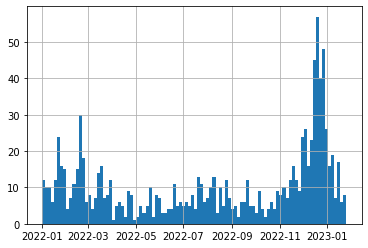

In [135]:
#plot a histogram of the number of complaints by time
all_pages_location['replyDate'] = pd.to_datetime(all_pages_location['replyDate'])

all_pages_location['replyDate'].hist(bins=100)



In [77]:
all_pages_location.zipcode.value_counts()

all_pages_location['zipcode'] = all_pages_location['zipcode'].astype(str)
all_pages_location

,replyID,replyDate,typeNameD,title,reply_object,province,city,county,zipcode,domainName,stateInfo,replyName,replyContentMain,handleTime,handleContent,url
0,17167343,2023-01-16 19:26:00,投诉/求助,郝家庄镇岭上村供气不足供暖不足,山西省长治市上党区委书记,山西省,长治市,NaN,140400,城建,办理中,吾***,自今年冬天入冬以来，上党区郝家庄镇岭上村天然气供气供暖都不足，每天一到做饭就没气，-15°的...,2023-01-17 19:31,您的留言我们已收到！您反映的问题已转相关部门处理，感谢您的宝贵留言！,http://liuyan.people.com.cn/threads/content?ti...
1,17163718,2023-01-16 02:38:00,投诉/求助,西留庄留苑小区暖气,山西省太原市尖草坪区委书记,山西省,太原市,尖草坪区,140108,城建,待回复,W***,尊敬的领导您好！我们这小区暖气每年晚来不说，来了家里面才13度，而且还是断断续续的给停。每次...,NaN,NaN,http://liuyan.people.com.cn/threads/content?ti...
2,17038159,2022-12-28 05:10:00,投诉/求助,煤气公司每年腊月基本白天都在停气！,山西省晋中市灵石县委书记,山西省,晋中市,灵石县,140729,城建,已办理,m***,静升镇这儿的煤气公司每年腊月白天各种停气，也不发通知，也没有公告，打电话从来打不进去。蒸馒头...,2023-01-06 04:54,尊敬的人民网网友： 您好！您的留言已收悉，现将办理结果回复如下：相关单位已协调气源厂加压...,http://liuyan.people.com.cn/threads/content?ti...
3,16999145,2022-12-23 08:37:00,投诉/求助,关于洪洞县堤村乡干河村天然气每晚停气,山西省委书记蓝佛安,山西省,NaN,NaN,140000,三农,待回复,8***,"我们村天然气每天晚上停气，严重影响到村民们正常生活和取暖问题,很多村民在村里反应，但是不给...",NaN,NaN,http://liuyan.people.com.cn/threads/content?ti...
4,16955074,2022-12-20 01:30:00,建言,取暖问题,山西省临汾市市长李云峰,山西省,临汾市,NaN,141000,三农,待回复,Z***,尊敬的领导你好 曲沃县裴南庄村三天两头停气，如此冷的天气，老人和...,NaN,NaN,http://liuyan.people.com.cn/threads/content?ti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,16840497,2022-12-05 03:35:00,建言,农村天然气取暖,河北省委书记倪岳峰,河北省,邢台市,隆尧县,130525,三农,已办理,W***,领导您好：我是河北省邢台市隆尧县东良镇小干言村村民。现在已进入冬季，农村现在响应国家号召实行...,2023-01-19 03:49,网民您好！经协调督办，您反映的停气问题已得到解决。相关情况已与您进行了沟通。感谢您对我们工作...,http://liuyan.people.com.cn/threads/content?ti...
1046,16841053,2022-12-05 04:28:00,建言,我村经常停天然气,河北省委书记倪岳峰,河北省,NaN,NaN,130000,三农,已办理,W***,由于天气很冷，我村天天停天然气，之前不让购买，现在让购买了天天停天然气，希望能尽快解决！！！,2023-01-19 03:48,网民您好！经协调督办，您反映的停气问题已得到解决。相关情况已与您进行了沟通。感谢您对我们工作...,http://liuyan.people.com.cn/threads/content?ti...
1047,16844344,2022-12-05 09:53:00,投诉/求助,鸡泽县中燃公司 限购天然气。经常停气，,河北省邯郸市市长樊成华,河北省,邯郸市,NaN,130400,三农,已办理,可***,鸡泽县中燃公司 限购天然气。经常停气，老百姓无法正常过冬，又不让烧煤，寒心了,2022-12-27 02:54,网民您好！针对您反映的问题，市政府高度重视，责成鸡泽县政府核实办理，现就您反映的问题答复如下...,http://liuyan.people.com.cn/threads/content?ti...
1048,16845394,2022-12-05 17:23:00,投诉/求助,煤改气,河北省保定市委书记党晓龙,河北省,保定市,NaN,130600,三农,已办理,马***,尊敬的书记好，我们是安国市南马村人，我们村煤改气前冬季取暖费3000以内就够了，改成天然气了...,2022-12-17 03:22,网民您好，您反映的问题我办已积极受理，交办至安国市发改局、住建局、南娄底乡调查解决。相关单位...,http://liuyan.people.com.cn/threads/content?ti...


In [78]:
adcodes = pd.read_csv('adcodes.csv')
adcodes.adcode

# extract first 6 digits of adcode in adcodes
adcodes['adcode'] = adcodes['adcode'].astype(str).str[:6]
adcodes.adcode
adcodes

,adcode,name,longitude,latitude
0,500233,忠县,108.039002,30.299559
1,410506,龙安区,114.301331,36.076225
2,310109,虹口区,121.505133,31.264600
3,140902,忻府区,112.746046,38.404242
4,140930,河曲县,111.138472,39.384482
...,...,...,...,...
3506,450924,兴业县,109.875304,22.736421
3507,150401,市辖区,NaN,NaN
3508,441624,和平县,114.938684,24.442180
3509,450603,防城区,108.353499,21.769211


In [79]:
# add information of adcodes to all_pages_location, using adcode in adcodes to mathc zipcode in all_pages_location
all_pages_location = pd.merge(all_pages_location, adcodes, how='left', left_on='zipcode', right_on='adcode')


In [80]:
all_pages_location

,replyID,replyDate,typeNameD,title,reply_object,province,city,county,zipcode,domainName,stateInfo,replyName,replyContentMain,handleTime,handleContent,url,adcode,name,longitude,latitude
0,17167343,2023-01-16 19:26:00,投诉/求助,郝家庄镇岭上村供气不足供暖不足,山西省长治市上党区委书记,山西省,长治市,NaN,140400,城建,办理中,吾***,自今年冬天入冬以来，上党区郝家庄镇岭上村天然气供气供暖都不足，每天一到做饭就没气，-15°的...,2023-01-17 19:31,您的留言我们已收到！您反映的问题已转相关部门处理，感谢您的宝贵留言！,http://liuyan.people.com.cn/threads/content?ti...,140400,长治市,113.116404,36.195409
1,17163718,2023-01-16 02:38:00,投诉/求助,西留庄留苑小区暖气,山西省太原市尖草坪区委书记,山西省,太原市,尖草坪区,140108,城建,待回复,W***,尊敬的领导您好！我们这小区暖气每年晚来不说，来了家里面才13度，而且还是断断续续的给停。每次...,NaN,NaN,http://liuyan.people.com.cn/threads/content?ti...,140108,尖草坪区,112.486691,37.940387
2,17038159,2022-12-28 05:10:00,投诉/求助,煤气公司每年腊月基本白天都在停气！,山西省晋中市灵石县委书记,山西省,晋中市,灵石县,140729,城建,已办理,m***,静升镇这儿的煤气公司每年腊月白天各种停气，也不发通知，也没有公告，打电话从来打不进去。蒸馒头...,2023-01-06 04:54,尊敬的人民网网友： 您好！您的留言已收悉，现将办理结果回复如下：相关单位已协调气源厂加压...,http://liuyan.people.com.cn/threads/content?ti...,140729,灵石县,111.778640,36.847927
3,16999145,2022-12-23 08:37:00,投诉/求助,关于洪洞县堤村乡干河村天然气每晚停气,山西省委书记蓝佛安,山西省,NaN,NaN,140000,三农,待回复,8***,"我们村天然气每天晚上停气，严重影响到村民们正常生活和取暖问题,很多村民在村里反应，但是不给...",NaN,NaN,http://liuyan.people.com.cn/threads/content?ti...,140000,山西省,112.562678,37.873499
4,16955074,2022-12-20 01:30:00,建言,取暖问题,山西省临汾市市长李云峰,山西省,临汾市,NaN,141000,三农,待回复,Z***,尊敬的领导你好 曲沃县裴南庄村三天两头停气，如此冷的天气，老人和...,NaN,NaN,http://liuyan.people.com.cn/threads/content?ti...,141000,临汾市,111.518975,36.088005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,16840497,2022-12-05 03:35:00,建言,农村天然气取暖,河北省委书记倪岳峰,河北省,邢台市,隆尧县,130525,三农,已办理,W***,领导您好：我是河北省邢台市隆尧县东良镇小干言村村民。现在已进入冬季，农村现在响应国家号召实行...,2023-01-19 03:49,网民您好！经协调督办，您反映的停气问题已得到解决。相关情况已与您进行了沟通。感谢您对我们工作...,http://liuyan.people.com.cn/threads/content?ti...,130525,隆尧县,114.770419,37.350172
1046,16841053,2022-12-05 04:28:00,建言,我村经常停天然气,河北省委书记倪岳峰,河北省,NaN,NaN,130000,三农,已办理,W***,由于天气很冷，我村天天停天然气，之前不让购买，现在让购买了天天停天然气，希望能尽快解决！！！,2023-01-19 03:48,网民您好！经协调督办，您反映的停气问题已得到解决。相关情况已与您进行了沟通。感谢您对我们工作...,http://liuyan.people.com.cn/threads/content?ti...,130000,河北省,114.530235,38.037433
1047,16844344,2022-12-05 09:53:00,投诉/求助,鸡泽县中燃公司 限购天然气。经常停气，,河北省邯郸市市长樊成华,河北省,邯郸市,NaN,130400,三农,已办理,可***,鸡泽县中燃公司 限购天然气。经常停气，老百姓无法正常过冬，又不让烧煤，寒心了,2022-12-27 02:54,网民您好！针对您反映的问题，市政府高度重视，责成鸡泽县政府核实办理，现就您反映的问题答复如下...,http://liuyan.people.com.cn/threads/content?ti...,130400,邯郸市,114.538959,36.625594
1048,16845394,2022-12-05 17:23:00,投诉/求助,煤改气,河北省保定市委书记党晓龙,河北省,保定市,NaN,130600,三农,已办理,马***,尊敬的书记好，我们是安国市南马村人，我们村煤改气前冬季取暖费3000以内就够了，改成天然气了...,2022-12-17 03:22,网民您好，您反映的问题我办已积极受理，交办至安国市发改局、住建局、南娄底乡调查解决。相关单位...,http://liuyan.people.com.cn/threads/content?ti...,130600,保定市,115.464589,38.874434


In [81]:
#extract latitude and longitude from location
all_pages_location['longitude'] = all_pages_location['longitude'].astype(float)
all_pages_location['latitude'] = all_pages_location['latitude'].astype(float)


In [83]:
# build a new dataframe with only the columns we need
all_pages_log_lat = all_pages_location[['replyID', 'replyDate', 'typeNameD', 'title', 'reply_object',  'longitude', 'latitude']]

In [85]:
all_pages_log_lat.to_csv('all_pages_log_lat.csv', index=False)

In [113]:
all_pages_location['stateInfo'].value_counts()
# 1049
#among all the complaints, more than 90 percent of them have been solved or resolved, and only 7 percent of them have not been replied by local government. The average time for local authorities to reply to complaints is more than 21 days.
solve_time = all_pages_location[all_pages_location['stateInfo'] == '已办理']
solve_time

#when the stateInfo is '已办理', the get the difference of replyDate and handleTime
solve_time['replyDate'] = pd.to_datetime(solve_time['replyDate'])
solve_time['handleTime'] = pd.to_datetime(solve_time['handleTime'])
solve_time['time_spent'] = solve_time['handleTime'] - solve_time['replyDate']


/var/folders/j_/_3yzbdjs3ylf4k27zrqrssqc0000gp/T/ipykernel_1708/4237608149.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solve_time['replyDate'] = pd.to_datetime(solve_time['replyDate'])
/var/folders/j_/_3yzbdjs3ylf4k27zrqrssqc0000gp/T/ipykernel_1708/4237608149.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solve_time['handleTime'] = pd.to_datetime(solve_time['handleTime'])
/var/folders/j_/_3yzbdjs3ylf4k27zrqrssqc0000gp/T/ipykernel_1708/4237608149.py:10: SettingWithCopyWarning: 
A value is trying

In [114]:
solve_time.to_csv('solve_time.csv', index=False)

#convert the time_spent to days
solve_time['time_spent'] = solve_time['time_spent'].dt.days

/var/folders/j_/_3yzbdjs3ylf4k27zrqrssqc0000gp/T/ipykernel_1708/107931444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solve_time['time_spent'] = solve_time['time_spent'].dt.days


In [117]:
#group by province and calulate the average time spen
# remove the province equals to '上海'
solve_time = solve_time[solve_time['province'] != '上海市']
solve_time.groupby('province')['time_spent'].mean()


province
云南省         25.500000
内蒙古自治区      10.785714
北京市         21.333333
吉林省         24.120000
四川省         14.660377
天津市         20.312500
宁夏回族自治区     44.666667
安徽省         18.705882
山东省         13.804878
山西省         28.340909
广东省         29.428571
广西壮族自治区     70.714286
新疆维吾尔自治区     1.000000
江苏省         19.125000
河北省         16.481203
河南省         14.416667
浙江省          9.000000
海南省         21.000000
湖北省         32.909091
湖南省         21.500000
甘肃省         18.590909
福建省         27.000000
贵州省         33.000000
辽宁省         33.693750
重庆市         26.000000
陕西省         17.379310
青海省          7.000000
黑龙江省        11.408163
Name: time_spent, dtype: float64

In [133]:
all_pages_location
#change the type of replyDate to datetime, only keep the date
all_pages_location['replyDate'] = pd.to_datetime(all_pages_location['replyDate'])




In [126]:
# How to calculate how many rows of data have the same date in replyDate column?
# https://stackoverflow.com/questions/56942670/how-to-calculate-how-many-rows-of-data-have-the-same-date-in-replydate-column
all_pages_location['replyDate']


0      2023-01-16 19:26:00
1      2023-01-16 02:38:00
2      2022-12-28 05:10:00
3      2022-12-23 08:37:00
4      2022-12-20 01:30:00
               ...        
1045   2022-12-05 03:35:00
1046   2022-12-05 04:28:00
1047   2022-12-05 09:53:00
1048   2022-12-05 17:23:00
1049   2022-12-05 20:14:00
Name: replyDate, Length: 1050, dtype: datetime64[ns]

In [129]:
result = all_pages_location.groupby('replyDate').size().reset_index(name='counts')
result.to_csv('date_result.csv', index=False)

In [145]:
all_pages_location.replyDate[0]

Timestamp('2023-01-16 19:26:00')

<AxesSubplot:>

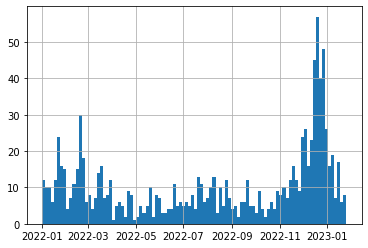

In [136]:
all_pages_location['replyDate'].hist(bins=100)


In [156]:
# create a list of days from 2022-01-01 to 2023-01-25, set the frequency to 3 day
date_list = pd.date_range('2022-01-01', '2023-01-26', freq='3D')
date_list

# create a dataframe with date_list
date_df = pd.DataFrame(date_list, columns=['date'])
date_df['count'] = 0
date_df['count'] = date_df['count'].astype(int)
date_df

,date,count
0,2022-01-01,0
1,2022-01-04,0
2,2022-01-07,0
3,2022-01-10,0
4,2022-01-13,0
...,...,...
126,2023-01-14,0
127,2023-01-17,0
128,2023-01-20,0
129,2023-01-23,0


In [177]:
#compare the date in date_df with the date in all_pages_location.replyDate, if the date in all_pages_location.replyDate is smaller than the date in date_df, then add 1 to the count in date_df

for i in (0,130):
    for j in (0,1049):
        if all_pages_location.loc[:,'replyDate'][j] < date_df.loc[:,'date'][i]:
            date_df.loc[:,'count'][i] = date_df.loc[:,'count'][i] + 1
        else:
            continue
    else:
        continue


/var/folders/j_/_3yzbdjs3ylf4k27zrqrssqc0000gp/T/ipykernel_1708/154222229.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df.loc[:,'count'][i] = date_df.loc[:,'count'][i] + 1


In [179]:
date_df.loc[:,'count']

0      0
1      0
2      0
3      0
4      0
      ..
126    0
127    0
128    0
129    0
130    8
Name: count, Length: 131, dtype: int64